<a href="https://colab.research.google.com/github/AnaKarenDRIV/FinanzasUniversitarias/blob/main/RED%20NEURONAL%20MULTI%20CAPA%20/Clasificaci%C3%B3n_de_la_flor_del_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= =====

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


120/120 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4875 - loss: 0.9562 - val_accuracy: 0.8333 - val_loss: 0.4645
Epoch 2/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8213 - loss: 0.4159 - val_accuracy: 0.9333 - val_loss: 0.2772
Epoch 3/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8641 - loss: 0.3688 - val_accuracy: 0.9667 - val_loss: 0.1900
Epoch 4/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8848 - loss: 0.2465 - val_accuracy: 0.9667 - val_loss: 0.1447
Epoch 5/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9460 - loss: 0.1777 - val_accuracy: 1.0000 - val_loss: 0.1167
Epoch 6/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9237 - loss: 0.1504 - val_accuracy: 1.0000 - val_loss: 0.0861
Epoch 7/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9488 - loss: 0.1241 - val_accuracy: 1.0000 - val_loss: 0.0669
Epoch 8/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9927 - loss: 0.0966 - val_accuracy: 0.9667 - val_

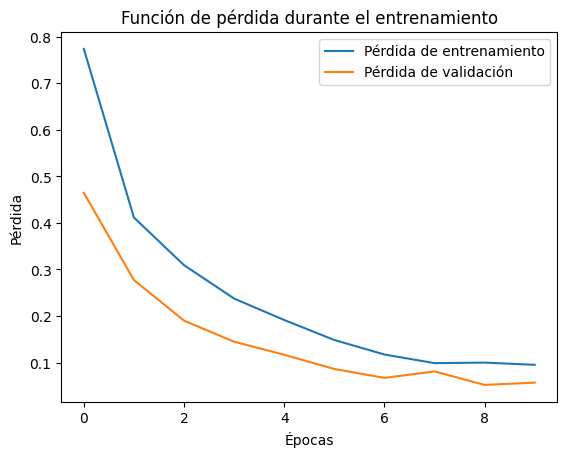

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step - accuracy: 1.0000 - loss: 0.0568
Loss: 0.05677994713187218, Accuracy: 1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
   Actual Class Index Actual Flower  Predicted Class Index Predicted Flower
0                   1    versicolor                      1       versicolor
1                   0        setosa                      0           setosa
2                   2     virginica                      2        virginica
3                   1    versicolor                      1       versicolor
4                   1    versicolor                      1       versicolor
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Sensitivity (Recall) for each class:
Class 0: 1.0
Class 1: 1.0
Class 2: 1.0


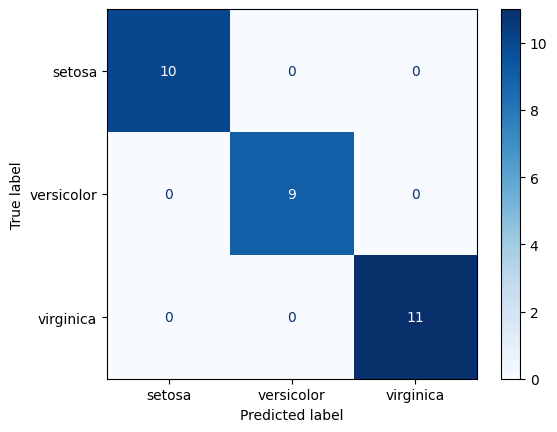

In [1]:
# Importamos el dataset de la flor de Iris desde sklearn
from sklearn.datasets import load_iris
iris = load_iris()

# La variable iris es un diccionario de Python (tipo Bunch)
# Verificamos las llaves que contiene
print(iris.keys())

# Imprimimos la descripción del dataset
# La llave DESCR contiene la información general del conjunto de datos
print(iris.DESCR)

# Exploramos más valores de algunas llaves importantes
iris.target_names     # Nombres de las especies de flores
iris.target           # Etiquetas numéricas de las clases (0, 1, 2)
iris.data             # Datos numéricos de las características
iris.feature_names    # Nombres de las características

# Importamos pandas para crear un DataFrame y visualizar mejor los datos
import pandas as pd

# Creamos el DataFrame con los datos y nombres de las columnas
iris_df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
iris_df

# Obtenemos una pequeña descripción estadística del DataFrame
iris_df.describe()

# ------------------------------------------------------
# PREPROCESAMIENTO DE DATOS
# ------------------------------------------------------

# Definimos las variables: X son los datos, y el target codificado en one-hot
X = iris_df
y = pd.get_dummies(iris.target).values  # Convierte el target en formato binario (0,1,0)

# Dividimos los datos en conjuntos de entrenamiento (train) y prueba (test)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      # 20% para prueba
    random_state=42     # Para reproducibilidad
)

# Mostramos las dimensiones de cada conjunto
print(X_train.shape)
print(X_test.shape)

# Escalamos los datos para que tengan media 0 y desviación estándar 1
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Ajusta y transforma el conjunto de entrenamiento
X_test = scaler.transform(X_test)        # Transforma el conjunto de prueba con los mismos parámetros

# También se podría usar MinMaxScaler() para escalar entre 0 y 1

# ------------------------------------------------------
# RED NEURONAL MULTICAPA
# ------------------------------------------------------

# Importamos los módulos de Keras para crear el modelo
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Definimos el modelo de red neuronal
modelo = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),  # Capa de entrada y primera capa oculta
    Dense(32, activation='relu'),                                   # Segunda capa oculta
    Dense(3, activation='softmax'),                                 # Capa de salida (3 clases)
])

# Sequential define la red como una pila de capas
# Dense significa que todas las neuronas están totalmente conectadas
# Se usa 'relu' como función de activación en capas ocultas y 'softmax' en salida

# ------------------------------------------------------
# COMPILAR EL MODELO
# ------------------------------------------------------

from tensorflow.keras.optimizers import Adam

# Definimos el optimizador Adam con una tasa de aprendizaje de 0.001
learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)

# Compilamos el modelo
modelo.compile(
    optimizer=adam_optimizer,              # Optimizador Adam
    loss='categorical_crossentropy',       # Función de pérdida para clasificación multiclase
    metrics=['accuracy']                   # Métrica a evaluar (precisión)
)

# También se puede usar simplemente optimizer='adam' en lugar de definirlo aparte

# ------------------------------------------------------
# ENTRENAR EL MODELO
# ------------------------------------------------------

# Entrenamos el modelo con los datos de entrenamiento
history = modelo.fit(
    X_train, y_train,
    epochs=10,             # Número de épocas de entrenamiento
    batch_size=1,          # Tamaño del lote (se entrena una muestra a la vez)
    validation_data=(X_test, y_test)  # Datos de validación
)

# Durante el entrenamiento se calcula la pérdida y la precisión para cada época

# ------------------------------------------------------
# GRÁFICANDO LA FUNCIÓN DE PÉRDIDA
# ------------------------------------------------------

import matplotlib.pyplot as plt

# Graficamos la pérdida de entrenamiento y validación
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Función de pérdida durante el entrenamiento')
plt.show()

# La función de pérdida debe tender hacia cero, lo que indica un buen aprendizaje

# ------------------------------------------------------
# EVALUACIÓN DEL MODELO
# ------------------------------------------------------

# Evaluamos el modelo con los datos de prueba
loss, accuracy = modelo.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# evaluate() devuelve la pérdida y precisión del modelo en el conjunto de prueba

# ------------------------------------------------------
# PREDICCIÓN
# ------------------------------------------------------

# Hacemos predicciones con el modelo entrenado
predictions = modelo.predict(X_test)

# Obtenemos el índice de la clase predicha para cada punto de datos
import numpy as np
predicted_classes = np.argmax(predictions, axis=1)

# Obtenemos el índice de la clase real
actual_classes = np.argmax(y_test, axis=1)

# Creamos un DataFrame comparando clases reales y predichas
comparison = pd.DataFrame({'Actual Class Index': actual_classes, 'Predicted Class Index': predicted_classes})

# Agregamos columnas con los nombres reales y predichos de las flores
comparison['Actual Flower'] = [iris.target_names[i] for i in actual_classes]
comparison['Predicted Flower'] = [iris.target_names[i] for i in predicted_classes]

# Reordenamos las columnas para una mejor visualización
comparison = comparison[['Actual Class Index', 'Actual Flower', 'Predicted Class Index', 'Predicted Flower']]
print(comparison.head())

# ------------------------------------------------------
# MATRIZ DE CONFUSIÓN Y SENSIBILIDAD (RECALL)
# ------------------------------------------------------

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score

# Calculamos nuevamente las predicciones
y_pred = modelo.predict(X_test)

# Convertimos las predicciones a clases (índices)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Calculamos la matriz de confusión
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Calculamos la sensibilidad (recall) para cada clase
sensitivity = recall_score(y_test_classes, y_pred_classes, average=None)

# Visualizamos la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap='Blues')

# Mostramos la sensibilidad (recall) para cada clase
print('Sensitivity (Recall) for each class:')
for i in range(3):
    print(f'Class {i}: {sensitivity[i]}')
